# **Exploratory Data Analysis on Movies Dataset**

## 1) Data Preparation and Cleaning
>
> -  Try to know more about the dataset given,
>
> -  handle the missing values(if any),
>
> -  then load the final dataset into pandas df.

In [2]:
import pandas as pd
import os

In [3]:
os.listdir()

['EDA_on_MoviesRatings.ipynb', 'MovieRatings.csv']

In [4]:
rating_df = pd.read_csv("MovieRatings.csv")

In [5]:
rating_df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       562 non-null    object
 1   Genre                      562 non-null    object
 2   Rotten Tomatoes Ratings %  562 non-null    int64 
 3   Audience Ratings %         562 non-null    int64 
 4   Budget (million $)         562 non-null    int64 
 5   Year of release            562 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.5+ KB


In [7]:
# Renaming some column names, so that data will look more clean.
rating_df.rename(columns = {"Rotten Tomatoes Ratings %":"Critics_rating","Audience Ratings %":"Audience_Ratings","Budget (million $)":"Budget_in_million","Year of release":"Year_of_release"}, inplace = True)

In [8]:
rating_df.head()

,Film,Genre,Critics_rating,Audience_Ratings,Budget_in_million,Year_of_release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


## 2) Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
>
> - Explore distributions of numeric columns using histograms etc.
>
> - Explore relationship between columns using scatter plots, bar charts etc.
>
> - Make a note of interesting insights from the exploratory analysis.

So let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [9]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### a) Visualization for each year of release

#### No. of films made in each year

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


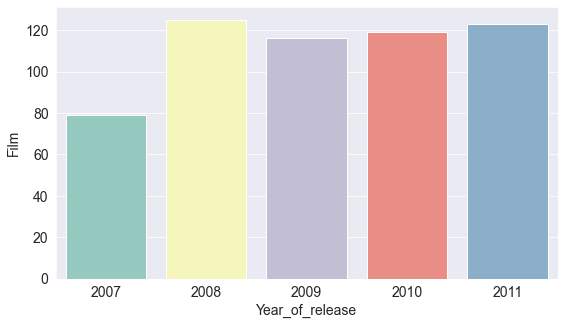

In [10]:
new_df = rating_df.groupby("Year_of_release").count()[["Film"]]
sns.barplot(new_df.index,new_df["Film"]);

### b) Graph of Genre : 
#### No. of Films made for each Genre

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


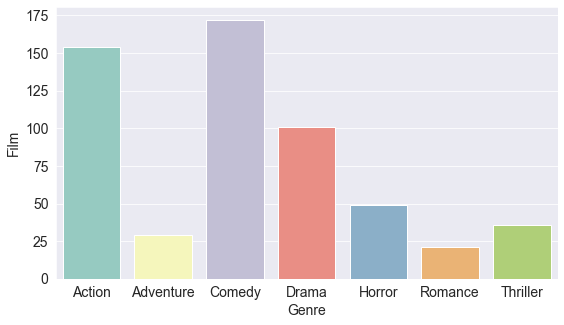

In [11]:
new_df = rating_df.groupby("Genre").count()[["Film"]]
# new_df
sns.barplot(new_df.index,new_df["Film"]);

### c) Graph of Genre v/s Budget : 
#### So lets first try to understand the relation b/w Genre of the movies and its budget

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


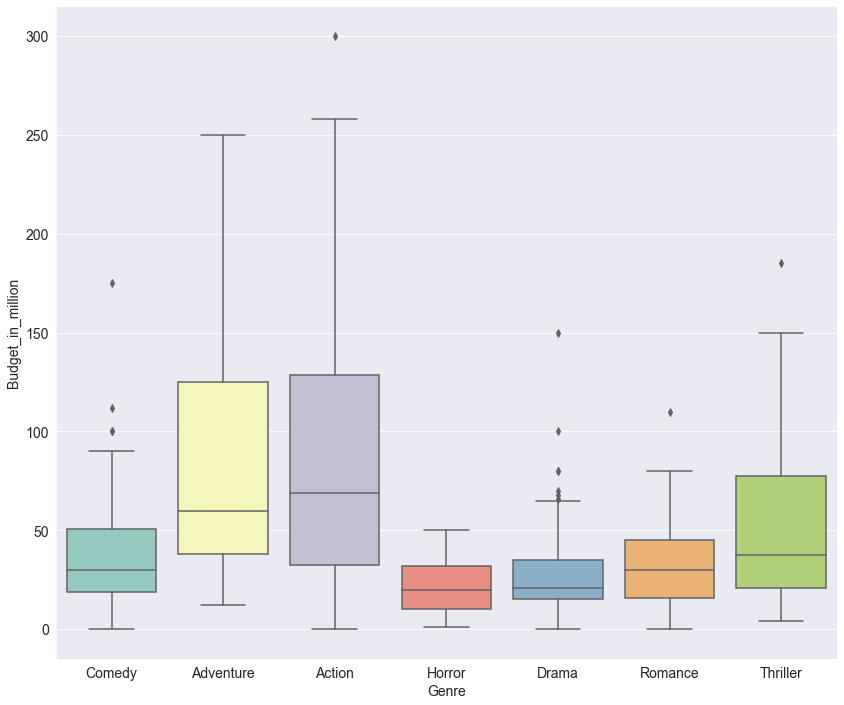

In [12]:
plt.figure(figsize=(14,12))
sns.boxplot(rating_df["Genre"],rating_df["Budget_in_million"]);

### d) Graph of Critics rating v/s Audience rating :
### For a particular Genre

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


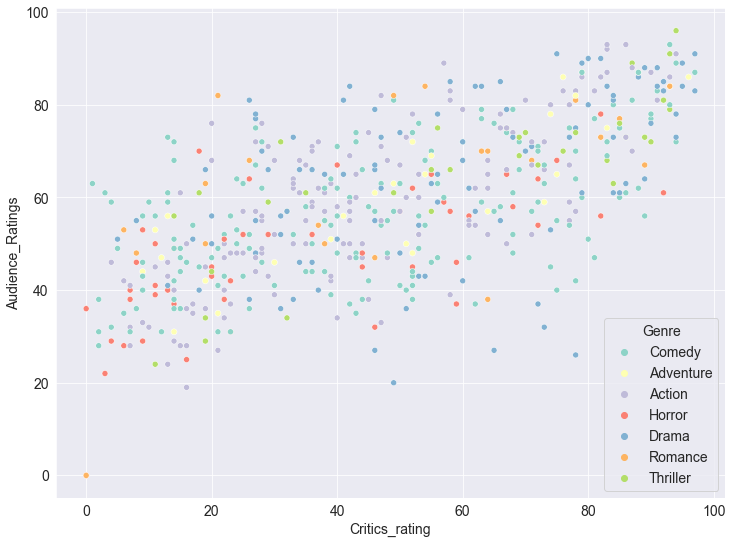

In [13]:
plt.figure(figsize=(12,9))
sns.scatterplot(rating_df["Critics_rating"],rating_df["Audience_Ratings"],hue=rating_df["Genre"]);

## 3) Asking and Answering Questions

> - Ask at least 5 interesting questions about your dataset
>
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
>
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
>
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

### Q1:  Film Producers are investing more money on which Genre of movies.

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


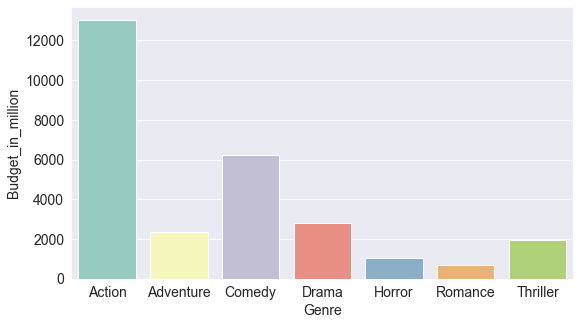

In [14]:
new_df = rating_df.groupby("Genre").sum()[["Budget_in_million"]]
sns.barplot(new_df.index,new_df["Budget_in_million"]);

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


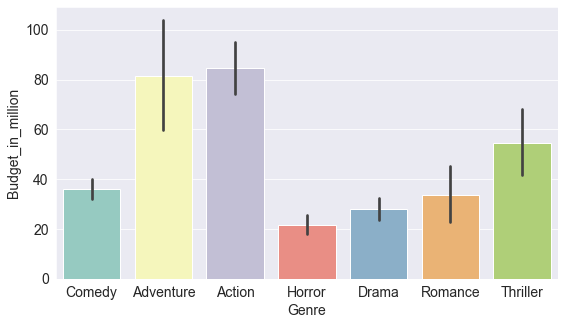

In [15]:
sns.barplot(rating_df["Genre"],rating_df["Budget_in_million"]);

C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


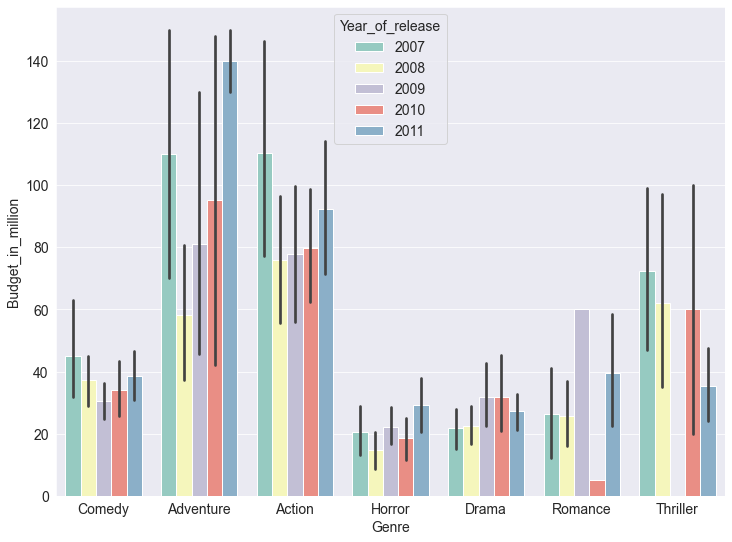

In [16]:
plt.figure(figsize=(12,9))
sns.barplot(rating_df["Genre"],rating_df["Budget_in_million"],hue=rating_df["Year_of_release"]);

#### ***Answer:  Action & Adventure***

> - So from the graph itself, we can observed that the budget given to action films are very very high as compare to any other Genre, so it is very clear that the Producers are investing their money more on Action & Adventure films, and not very much on Horror or Dramatic films.

### Q2: For which movies, Audience Ratings were much higher then Critics Ratings?

In [17]:
new_df = rating_df.groupby("Genre").sum()[["Critics_rating","Audience_Ratings"]]
new_df

,Critics_rating,Audience_Ratings
Genre,,
Action,6838,9043
Adventure,1540,1819
Comedy,7726,9702
Drama,5704,6507
Horror,1694,2322
Romance,1012,1309
Thriller,2127,2361


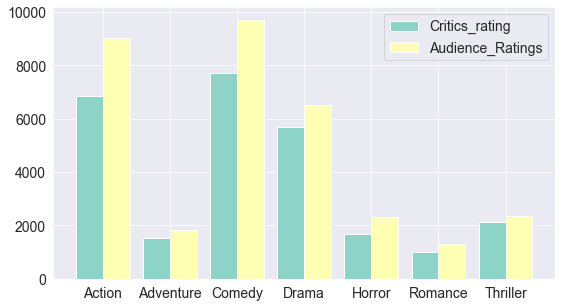

In [18]:
l = np.arange(7)
plt.bar(l-0.2,new_df["Critics_rating"],0.4,label="Critics_rating")
plt.bar(l+0.2,new_df["Audience_Ratings"],0.4,label="Audience_Ratings")
plt.xticks(l,list(new_df.index))
plt.legend()
plt.show()

#### ***Answer: Action & Comedy Films***

> - So from graph of Critics rating v/s Audience rating, we can see that Audience trends to like each Genre's film then compare to Critics, as for each Genre, audience rating is always higher then critics rating. But for Action and and Comedy films, Audience ratings were much higher then critics ratings, which means audience likes Comedy as well as Actions films over any other Genre.

### Q3: Examine the year wise trends of Critics Ratings & Audience Ratings

In [19]:
new_df = rating_df.groupby("Year_of_release").sum()[["Critics_rating","Audience_Ratings"]]
new_df

,Critics_rating,Audience_Ratings
Year_of_release,,
2007,3931,5247
2008,5610,7230
2009,5231,6430
2010,5422,6600
2011,6447,7556


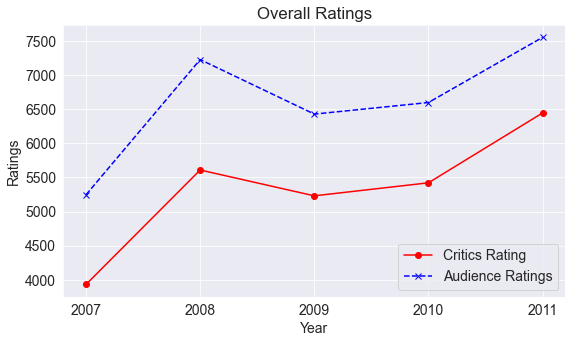

In [20]:
plt.plot(new_df.index,new_df["Critics_rating"],"o-r")
plt.plot(new_df.index,new_df["Audience_Ratings"],"x--b")
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.xticks([2007,2008,2009,2010,2011])
plt.legend(["Critics Rating","Audience Ratings"])
plt.title("Overall Ratings")
plt.show();

In [21]:
new_df = rating_df.groupby("Year_of_release").mean()[["Critics_rating","Audience_Ratings"]]
new_df

,Critics_rating,Audience_Ratings
Year_of_release,,
2007,49.759494,66.417722
2008,44.880000,57.840000
2009,45.094828,55.431034
2010,45.563025,55.462185
2011,52.414634,61.430894


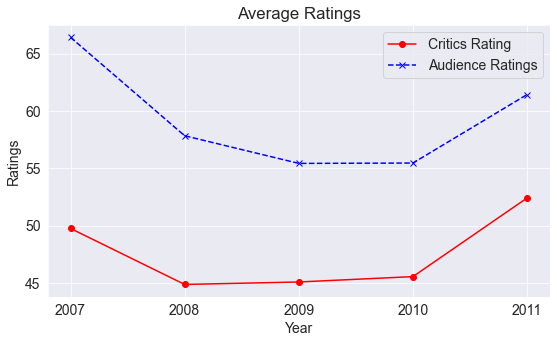

In [22]:
plt.plot(new_df.index,new_df["Critics_rating"],"o-r")
plt.plot(new_df.index,new_df["Audience_Ratings"],"x--b")
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.xticks([2007,2008,2009,2010,2011])
plt.legend(["Critics Rating","Audience Ratings"])
plt.title("Average Ratings")
plt.show();

> - So, As we can observed from the above graph of Overall Ratings and Average Ratings, we can say that Audience always rate the movie higher then Critics.

### Q4: Examine the year wise trends of Budget given to movies

In [23]:
new_df = rating_df.groupby("Year_of_release").sum()[["Budget_in_million"]]
new_df

,Budget_in_million
Year_of_release,
2007,4571
2008,5803
2009,5581
2010,5997
2011,6207


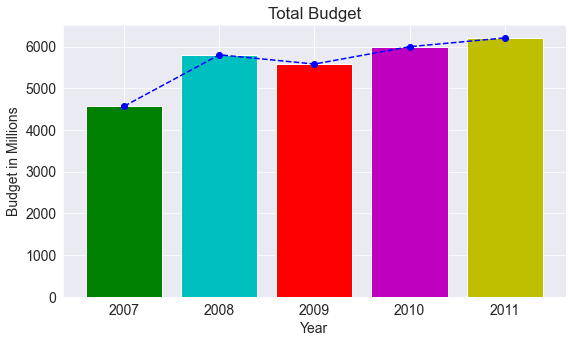

In [24]:
plt.plot(new_df.index,new_df["Budget_in_million"],"o--b")
plt.bar(new_df.index,new_df["Budget_in_million"], color=['g','c','r','m','y'])
plt.xlabel("Year")
plt.ylabel("Budget in Millions")
plt.xticks([2007,2008,2009,2010,2011])
plt.title("Total Budget")
plt.show();

In [25]:
new_df = rating_df.groupby("Year_of_release").mean()[["Budget_in_million"]]
new_df

,Budget_in_million
Year_of_release,
2007,57.860759
2008,46.424000
2009,48.112069
2010,50.394958
2011,50.463415


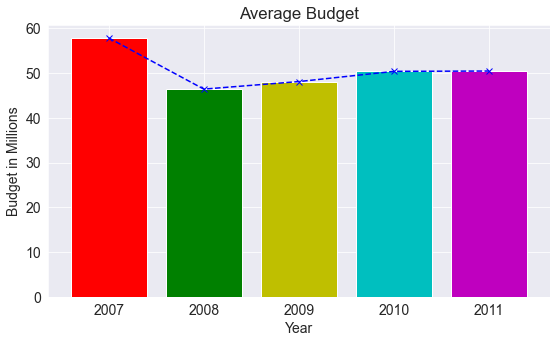

In [26]:
plt.plot(new_df.index,new_df["Budget_in_million"],"x--b")
plt.bar(new_df.index,new_df["Budget_in_million"], color=['r','g','y','c','m'])
plt.xlabel("Year")
plt.ylabel("Budget in Millions")
plt.xticks([2007,2008,2009,2010,2011])
plt.title("Average Budget")
plt.show();

> - So from graph of total budget we can say that the annual budget seems to grow continuously, except in 2009 where it went down a little bit, but other than that it was increasing annually.

### Q5: Examine the year wise trends of Movies making for each Genre

In [27]:
new_df = rating_df.groupby(["Year_of_release","Genre"]).count()[["Film"]]
new_df2 = new_df.reset_index()
new_df2

,Year_of_release,Genre,Film
0,2007,Action,18
1,2007,Adventure,2
2,2007,Comedy,22
3,2007,Drama,12
4,2007,Horror,9
5,2007,Romance,5
6,2007,Thriller,11
7,2008,Action,32
8,2008,Adventure,11
9,2008,Comedy,41


C:\Users\jaypi\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


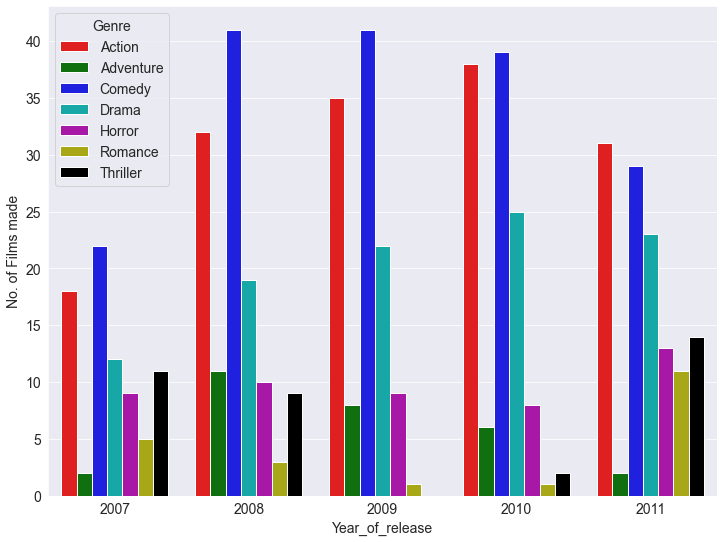

In [31]:
plt.figure(figsize=(12,9))
sns.barplot(new_df2["Year_of_release"],new_df2["Film"],hue=new_df2["Genre"], palette=['r','g','b','c','m','y','k']);
plt.ylabel("No. of Films made")
plt.show();

> - Hence, from the graph we can observed that, annually, the no. of films made was increased continuously, but the craze for Action and Comedy movies were so high.

## 4) Inferences and Conclusion

> - The Audience trends to rate any Film higher than Critics.
>
> - The Budget for Action & Adventure movies were much higher then other Genre's movies.
>
> - The Annual budget is increasing continuously for making Films.
>
> - The Action and Comedy movies were mostly liked by audience.